#### Problem statement

We want to gauge how likely it is that a message comes from an "english" distribution of characters.

#### Assumptions
 
1. An orale gives us the underlying distribution

2. While a letter such as "e" may be more likely than a letter such as "x", a message such as eeeeee should be less likely than a message such as exxxx. 


#### Below we're going to try to derive such a metric. 

In [40]:
import scipy.stats as stats
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [39]:
# first we download the frequencies from http://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html

df = pd.read_html("http://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html")[0]

header = df.loc[0]

df = df.loc[1:]

df = df[[0, 1, 4]]

df = df.set_index(0)
df.sort_index(inplace=True)

df.columns = ["counts", "ratios"]

df['probability'] = df.counts.astype(int) / df.counts.astype(int).sum()

def draw_letter():
    return np.random.choice(list(df.index), p=list(df.probability))



'H'

<AxesSubplot:xlabel='keys'>

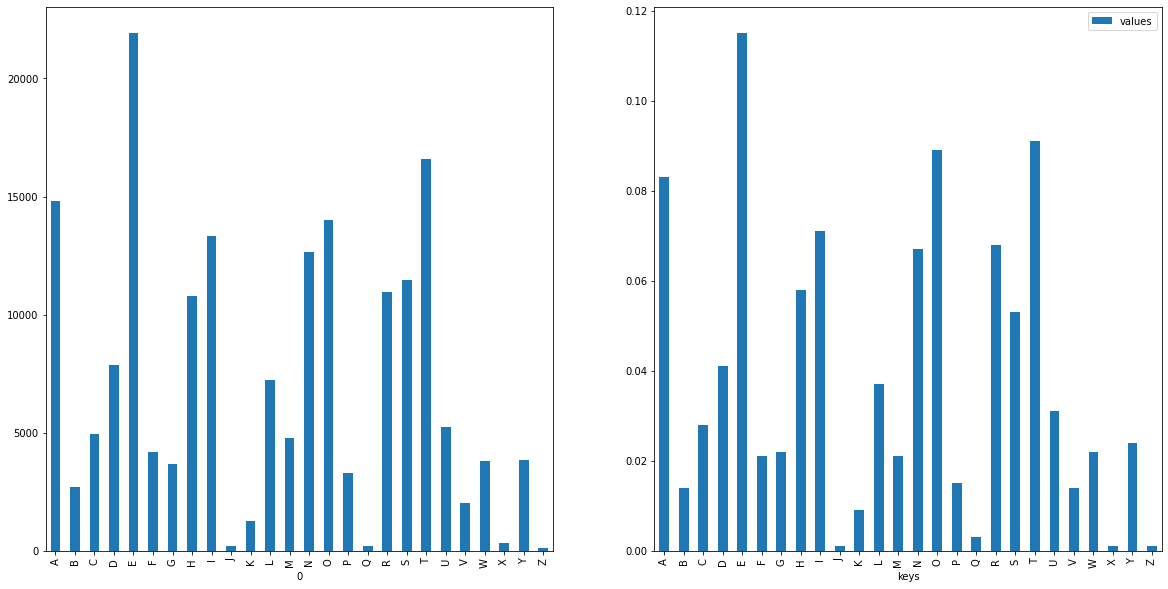

In [65]:
# Let's confirm that using the draw letter method will give us a similar distribution as the original 


fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 10)

def take_sample(sample_size=1000):
    data = {key: 0 for key in df.index}
    
    for _ in range(sample_size):
        data[draw_letter()] += 1 
        
    frame = pd.DataFrame({
        'keys': data.keys(),
        'values': data.values()
    })
    
    frame = frame.set_index('keys')
    
    frame.values = frame.values / frame.values.sum()
    return frame 

df.counts.astype(int).plot.bar(ax=ax1)

take_sample().plot.bar(ax=ax2)

<AxesSubplot:xlabel='keys'>

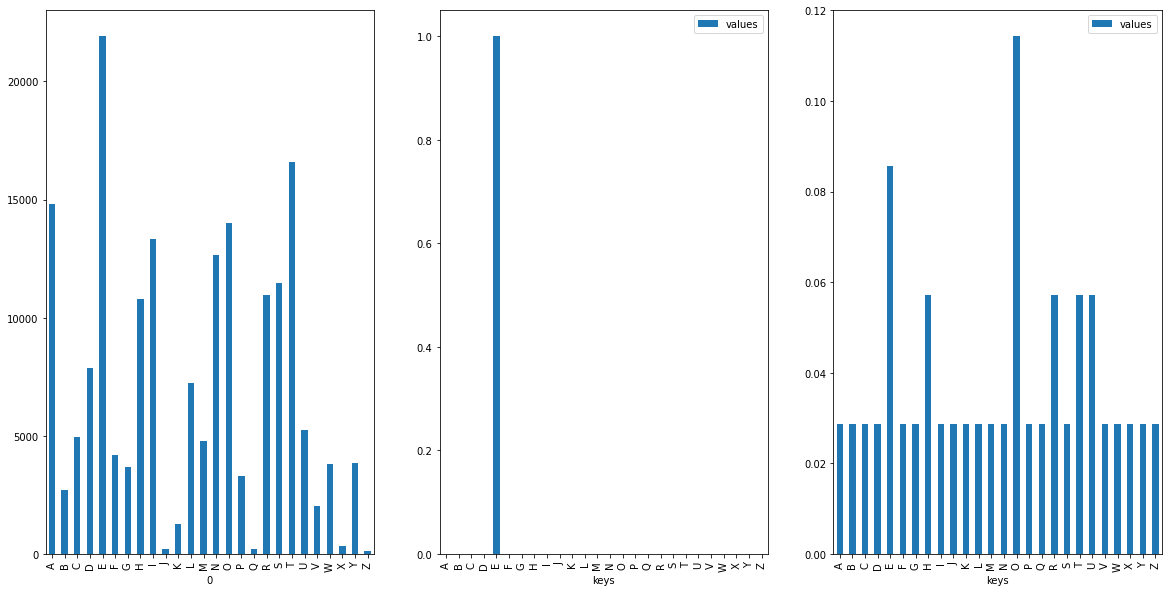

In [66]:
def sample_from_text(string):
    data = {key: 0 for key in df.index}
    
    for char in string.upper():
        if char in data:
            data[char] += 1
            
    frame = pd.DataFrame({
        'keys': data.keys(),
        'values': data.values()
    })
    
    frame = frame.set_index('keys')
    
    frame.values = frame.values / frame.values.sum()
    
    return frame 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(20, 10)

df.counts.astype(int).plot.bar(ax=ax1)

sample_from_text("eeeeee").plot.bar(ax=ax2)

sample_from_text("the quick brown fox jumps over the lazy dog").plot.bar(ax=ax3)

In [116]:
# Now lets choose a metric that makes sense
# Note that we are mostly going to look at short messages 

positives = [take_sample(40) for _ in range(2)]
negatives = [
    sample_from_text(";lkjasd;lfkjas;dlkfjas;ldkfjasdf"),
    sample_from_text("eeeeeeeeeeeeeeee")
]

maybe = [
    sample_from_text("the quick brown fuck jumps over the lazy dog"),
    sample_from_text("my partners' mother was diagnosed with cancer, and I don't know what it would mean for our relationship to lose her")
]

data = positives + negatives + maybe 


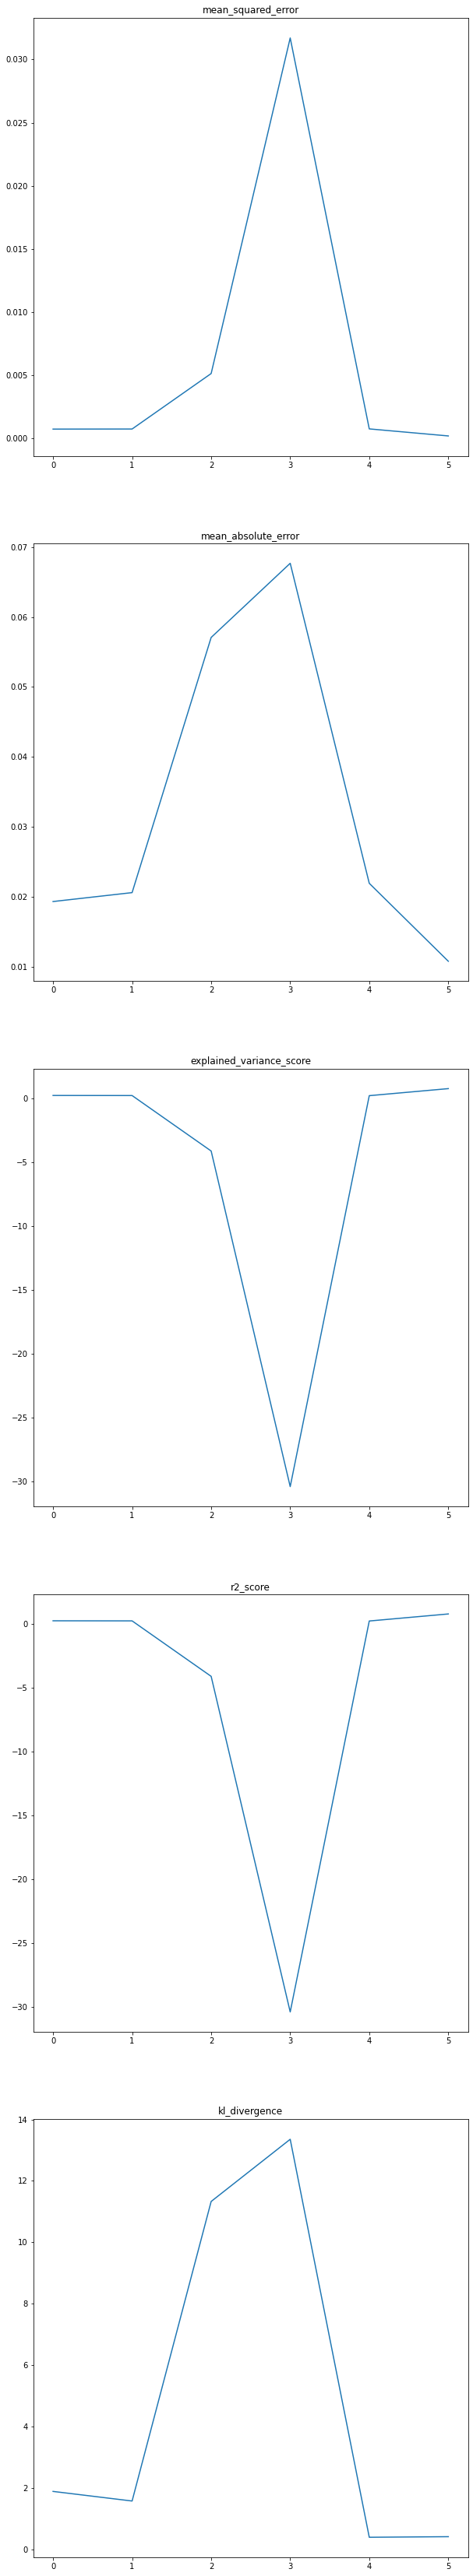

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

def kl_divergence(p, q):
    return np.sum(-p * np.log2((q + .000001) / p))

funcs = [mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, kl_divergence]
scores = []
for f in funcs:
    scores.append([
        f(df.probability, sample['values']) for sample in data
    ])

scores

fig, axes = plt.subplots(5, 1)

fig.set_size_inches(w=10, h=60)
x = list(range(len(scores[0])))

for ax, title, y in zip(axes, map(lambda f: f.__name__, funcs), scores):
    ax.plot(x, y)
    ax.set_title(title)
    

In [96]:
data[0]

probabilities

data[0]['values'] / probabilities

keys
A    1.846418
B    0.000000
C    1.844052
D    1.157626
E    0.415989
F    0.000000
G    2.468224
H    1.688773
I    0.000000
J    0.000000
K    0.000000
L    1.256742
M    0.000000
N    0.719655
O    0.650943
P    0.000000
Q    0.000000
R    3.321545
S    0.796083
T    1.648607
U    0.000000
V    0.000000
W    0.000000
X    0.000000
Y    0.000000
Z    0.000000
dtype: float64